<input type="image" src="POE_banner.jpg" alt="Submit" width="1700" height="600">

# Imports:

In [1]:
from sklearn.datasets import load_files
import cv2 # image processing library
from PIL import Image # image processing library
import numpy as np  # numpy library
import pandas as pd # pandas library
import tensorflow as tf # deep learning library
import os   # operating system library
import gc   # garbage collector library

# Visualize the data
import matplotlib.pyplot as plt # plotting library
import matplotlib.image as mpimg    # plotting library
import plotly.express as px # plotting library
import seaborn as sns #Seaborn

# Evaluation metrics
from sklearn.metrics import confusion_matrix    # confusion matrix library
from sklearn.metrics import classification_report   # classification report library
from sklearn.model_selection import train_test_split # data splitting library


# Deep Learning Libraries
from tensorflow import keras    # deep learning library
from keras.models import Sequential  # deep learning library
from keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization  # deep learning library
from keras.preprocessing.image import ImageDataGenerator    # deep learning library
from keras.callbacks import EarlyStopping, ReduceLROnPlateau    # deep learning library       

# Dataset Reference:
# https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
# Author: Ananthu Balakrishnan (ananthu017)

*Please note:* This notebook has been built using Tensorflow and Keras but mainly Keras. They both can be used to perform the same tasks since Keras uses Tensorflow backend. \
The reason for using Keras rather than Tensorflow is due to Keras receiving more frequent updates and has newer features.

In [101]:
# Tensorflow and Keras tend to use a lot of gpu memory, so this code is used to improve the memory management
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Type: {}, name: {}".format(gpu.name, gpu.device_type))
    tf.config.experimental.set_memory_growth(gpu, True)

Type: /physical_device:GPU:0, name: GPU


Image Classification uses a lot of processing power especially when using Tensorflow and Keras. \
Therefore, the code above is meant to improve Tensorflows memory management. I found myself experiencing less crashes due to insufficient memory when I ran this code 

In [102]:
# Store the directory path
train_dir = 'Train/'
test_dir = 'Test/'

In [103]:
# Store the directory path of each emotion
rotate_angry_dir = os.listdir('train/angry/')
rotate_disgust_dir = os.listdir('train/disgusted/')
rotate_fear_dir = os.listdir('train/fearful/')
rotate_happy_dir = os.listdir('train/happy/')
rotate_neutral_dir = os.listdir('train/neutral/')
rotate_sad_dir = os.listdir('train/sad/')
rotate_surprise_dir = os.listdir('train/surprised/')


In [104]:
data = []
labels = []

# for loop to iterate through the angry images in the directory and convert them to RGB and resize them
for i in rotate_angry_dir:
    try:
    
        image = cv2.imread("train/angry/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((48 , 48))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')

# for loop to iterate through the disgusted images in the directory and convert them to RGB and resize them
for j in rotate_disgust_dir:
    try:
    
        image = cv2.imread("train/disgusted/"+j)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((48 , 48))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')

# for loop to iterate through the fearful images in the directory and convert them to RGB and resize them
for k in rotate_fear_dir:
    try:
    
        image = cv2.imread("train/fearful/"+k)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((48 , 48))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(2)
        labels.append(2)
        labels.append(2)
        labels.append(2)
        
    except AttributeError:
        print('')

# for loop to iterate through the happy images in the directory and convert them to RGB and resize them
for l in rotate_happy_dir:
    try:
    
        image = cv2.imread("train/happy/"+l)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((48 , 48))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(3)
        labels.append(3)
        labels.append(3)
        labels.append(3)
        
    except AttributeError:
        print('')

# for loop to iterate through the neutral images in the directory and convert them to RGB and resize them
for m in rotate_neutral_dir:
    try:
    
        image = cv2.imread("train/neutral/"+m)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((48 , 48))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(4)
        labels.append(4)
        labels.append(4)
        labels.append(4)
        
    except AttributeError:
        print('')

# for loop to iterate through the sad images in the directory and convert them to RGB and resize them
for n in rotate_sad_dir:
    try:
    
        image = cv2.imread("train/sad/"+n)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((48 , 48))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(5)
        labels.append(5)
        labels.append(5)
        labels.append(5)
        
    except AttributeError:
        print('')

# for loop to iterate through the surprised images in the directory and convert them to RGB and resize them
for o in rotate_surprise_dir:
    try:
    
        image = cv2.imread("train/surprised/"+o)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((48 , 48))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(6)
        labels.append(6)
        labels.append(6)
        labels.append(6)
        
    except AttributeError:
        print('')


In [6]:
# count the number of images in tran variable
print(len(data))

114836


The dataset contains only 35 685 images. To increase the training size of the training dataset, the images have been roated by 45, 75 degrees and blurred.  
This has increased the size of the dataset to 114 836 images which meets the requirements of the POE and should increase the models accuracy.

The dataset consists of 114 836 Observations and 7 classes

In [7]:
# Print first image in array
print(data[0])

[[[ 70  70  70]
  [ 80  80  80]
  [ 82  82  82]
  ...
  [ 52  52  52]
  [ 43  43  43]
  [ 41  41  41]]

 [[ 65  65  65]
  [ 61  61  61]
  [ 58  58  58]
  ...
  [ 56  56  56]
  [ 52  52  52]
  [ 44  44  44]]

 [[ 50  50  50]
  [ 43  43  43]
  [ 54  54  54]
  ...
  [ 49  49  49]
  [ 56  56  56]
  [ 47  47  47]]

 ...

 [[ 91  91  91]
  [ 65  65  65]
  [ 42  42  42]
  ...
  [ 72  72  72]
  [ 56  56  56]
  [ 43  43  43]]

 [[ 77  77  77]
  [ 82  82  82]
  [ 79  79  79]
  ...
  [105 105 105]
  [ 70  70  70]
  [ 46  46  46]]

 [[ 77  77  77]
  [ 72  72  72]
  [ 84  84  84]
  ...
  [106 106 106]
  [109 109 109]
  [ 82  82  82]]]


The images have been imported into a numpy array and the RGB metrics of each images have been stored in the array

In [105]:
# create copy of data and labels (Used for pipeline testing) 
pipeline_data_copy = data
pipeline_labels_copy = labels

# Exploratory Data Analysis:

In [9]:
# store the names of the classes in a list
class_names  = ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sadness', "Surprised"]

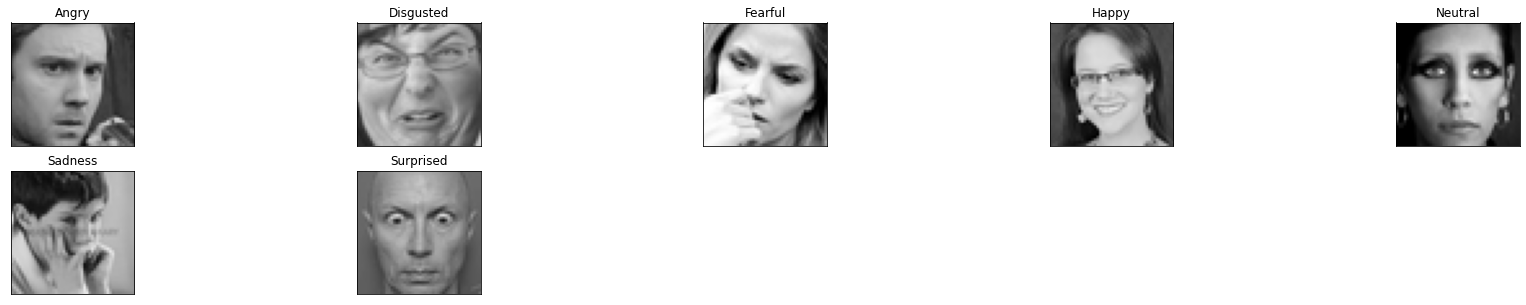

In [10]:
# select random image from each class and add to the list
random_images = []
random_labels = []
for i in range(7):
    random_images.append(data[labels.index(i)])
    random_labels.append(labels[labels.index(i)])

# plot the random images
fig = plt.figure(figsize =(30,5))
for i in range(7):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(random_images[i]))
    ax.set_title(class_names[random_labels[i]])

Each image from the dataset is already in greyscale, Therefore the RGB metrics must be converted to greyscale before building the model.\
Greyscale will also increase model accuracy due to reducing the number of layers which reduces the complexity of the model.

We can see after displaying the images from each emotion that it is easy to define which emotion the image is trying to portray.\
This is good because it will allow the model to easily learn from the training data.

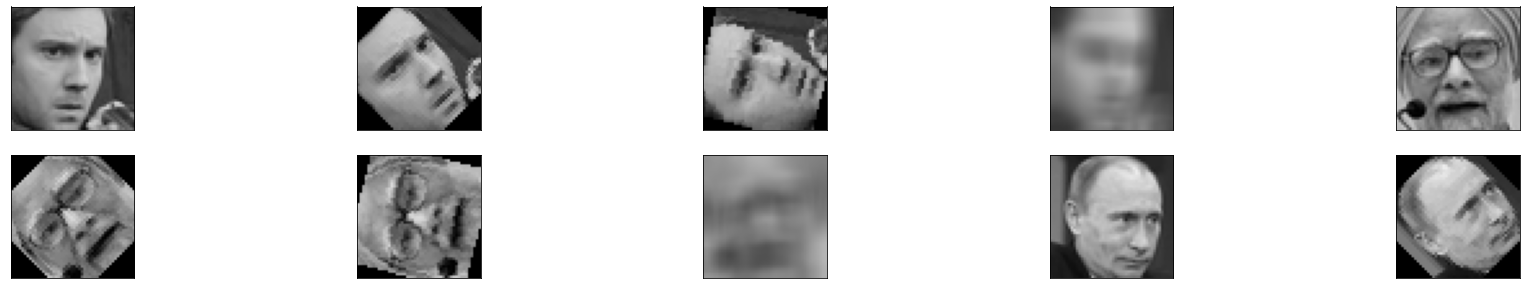

In [11]:
#Displays the first 10 images from the dataset
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(data[i]))

Ten random images were selected from the dataset, we can see that some images have been rotated and blurred.\
This visualization confirms that the previous method used to import the images worked correctly.

Another Advantage of rotating and bluring the images: \
When this type of model is deployed in a real life situation, the model might not always be able to get a clear and upright picture of a persons face.\
Therefore, providing the model with blurred and rotated images will increase the models performance once it has been deployed.

In [12]:
# method to display the percentages above the bars in the bar graph
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

c:\Users\Sean\miniconda3\envs\yip\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


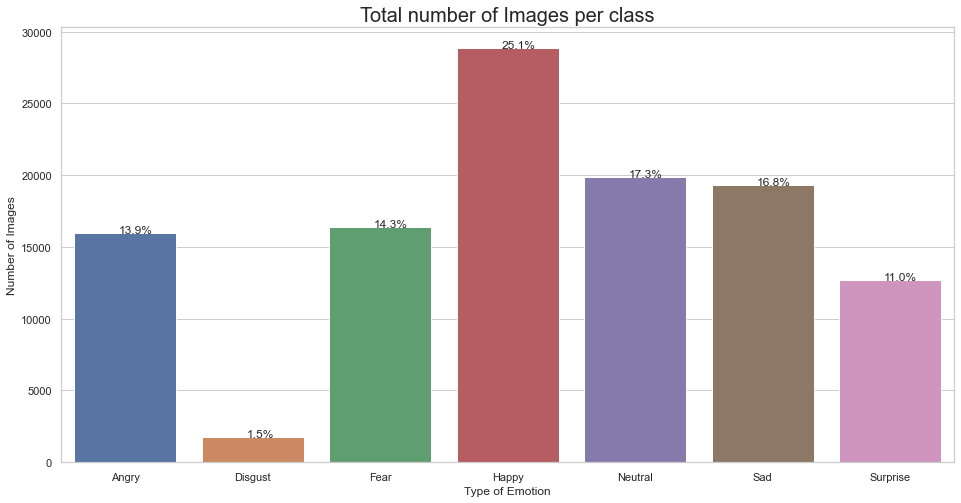

In [13]:
# create bar plot for the number of images in each class in data and labels
sns.set(style="whitegrid")
plt.figure(figsize=(16,8))
total = float(len(labels))
sns.countplot(labels)
plt.title('Total number of Images per class', fontsize=20)
plt.xlabel('Type of Emotion')
plt.ylabel('Number of Images')

# set the labels for the classes
plt.xticks([0,1,2,3,4,5,6],['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise'])

# add the percentage of images in each class
without_hue(plt.gca(), labels)
plt.show()

From the bar chart we can interpret, that the dataset is imbalance.\
This is important to note because it may affect the accuracy of predictiing certain classes.\
In order the most common classes are: Happy, Neutral, Sad, Fear, Angry, Surpise and Disgust

In [14]:
# count the number of images in each class
print("Number of images in each class:")
print("Angry:    ",labels.count(0))
print("Disgust:  ",labels.count(1))
print("Fear:     ",labels.count(2))
print("Happy:    ",labels.count(3))
print("Neutral:  ",labels.count(4))
print("Sad:      ",labels.count(5))
print("Surprise: ",labels.count(6))

Number of images in each class:
Angry:     15980
Disgust:   1744
Fear:      16388
Happy:     28860
Neutral:   19860
Sad:       19320
Surprise:  12684


The bar chart is good at visualizing the dataset but it is important to note the actual totals of each class.\
SMOTE is not good for image classfication, it requires the data to be flattened which loses the localized information.\
SMOTE will also regenerate the same images multiple times which can lead to overfitting. \
Therfore, I have chosen not to use smote and rather let the CNN algorithm do the heavy lifting.


# Feature Engineering:

In [15]:
# Convert to Greyscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [16]:
# convert all the images to grayscale
gray_data = []
for i in range(len(data)):
    gray_data.append(rgb2gray(data[i]))

In [17]:
# Display grey scale image
print(gray_data[0])

[[ 69.993   79.992   81.9918 ...  51.9948  42.9957  40.9959]
 [ 64.9935  60.9939  57.9942 ...  55.9944  51.9948  43.9956]
 [ 49.995   42.9957  53.9946 ...  48.9951  55.9944  46.9953]
 ...
 [ 90.9909  64.9935  41.9958 ...  71.9928  55.9944  42.9957]
 [ 76.9923  81.9918  78.9921 ... 104.9895  69.993   45.9954]
 [ 76.9923  71.9928  83.9916 ... 105.9894 108.9891  81.9918]]


The images were captured in greyscale, therefore to increase the model's performance the images have been converted back into Greyscale.
Converting the images to greyscale will also reduce the number of dimensions that the CNN algorithm has to process which will reduce training time

In [18]:
# convert the data and labels to numpy arrays
emotions = np.array(gray_data)
labels = np.array(labels)

In [19]:
# print the shape of the data and labels
print('emotions : {} | labels : {}'.format(emotions.shape , labels.shape))

emotions : (114836, 48, 48) | labels : (114836,)


In [20]:
# Reshape the data to fit the model
emotions = emotions.reshape(emotions.shape[0] , emotions.shape[1], emotions.shape[2] , 1)

In [21]:
# print the shape of the data and labels
print('emotions : {} | labels : {}'.format(emotions.shape , labels.shape))

emotions : (114836, 48, 48, 1) | labels : (114836,)


The image data and labels have been converted to a numpy array.\
A numpy array allows the CNN algorithm to process the data efficiently.

The Numpy array has also been reshaped to fit the shape of the model.

In [22]:
# reshape the labels to be a 2D array and shuffle the data
n = np.arange(emotions.shape[0])
np.random.shuffle(n)
emotions = emotions[n]
labels = labels[n]

In [23]:
# convert the data to float32 and/or int and normalize the data
emotions = emotions.astype(np.float32)
labels = labels.astype(np.int32)
emotions = emotions/255

The numpy arrays have been shuffled to reduce noise and overfitting.\
The Label numpy array has been converted to an Int to fit the models structure.\
The emotions numpy array has been normalized to reduce the dimensions of the dataset.

# Building the Model:

In [24]:
# split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(emotions, labels, test_size=0.2, random_state=42)

The dataset has been split into a 80% train data and 20% test data.\
The dataset only contains 100 000 records therefore a larger training set is required to reduce overfitting.

In [25]:
# Clears the garbage collector so these variables are not stored in memory and take up space
del emotions
#del labels
del data
gc.collect()

16745

Due to Tensorflow and Keras using high amounts of memory, I have implemented a method that calls the garbage collector.\
This method is used to clear unused variables that are sitting in memory. 

In [26]:
# displays the x_train shape
x_train.shape

(91868, 48, 48, 1)

In [27]:
# displays the y_train shape
y_train.shape

(91868,)

The dataset has been split into training and test data.\
The shape of the training variables are correct.\
The training dataset consists of 91 868 observations

In [106]:
# Create a Sequential model and add the layers
model= Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 

model.add(Dense(100,activation = 'relu'))

model.add(Dense(50,activation = 'relu'))

model.add(Dense(225,activation = 'relu'))

model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)      

<li>This model consists of 4 layers and requires and input shape of 48,48,1.</li>
<li>The model has been compiled using the sparse_categorical_crossentropy loss and activation function softmax.</li>
<li>These two methods are the most appropriate for the type of input data I am providing to the model.</li>
<li>The optimizer selected is adam and the metric is accuracy. These two methods provide the best accuracy for Image data while still keeping the runtime manageable.</li>

In [29]:
# Creates early stop variable for the model
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)

<li>This is a method that allows you to specify a large amount of training Epochs and stop training once the model performance stops improving on a validation set </li>
<li> This method is used to combat over and underfitting</li>

In [30]:
# Fit the model (This method took 6 min to run on my computer)
batch_size = 48
epochs = 50
first_model_history = model.fit(x_train, y_train, epochs = epochs, batch_size=batch_size,validation_data=(x_test,y_test), callbacks=[early_stop], verbose = 1)

Epoch 1/50
1914/1914 [==============================] - 35s 16ms/step - loss: 1.7721 - accuracy: 0.2918 - val_loss: 1.5857 - val_accuracy: 0.3904
Epoch 2/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.4366 - accuracy: 0.4443 - val_loss: 1.3462 - val_accuracy: 0.4805
Epoch 3/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.3101 - accuracy: 0.4989 - val_loss: 1.2782 - val_accuracy: 0.5119
Epoch 4/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.2228 - accuracy: 0.5362 - val_loss: 1.2593 - val_accuracy: 0.5199
Epoch 5/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.1490 - accuracy: 0.5663 - val_loss: 1.2101 - val_accuracy: 0.5415
Epoch 6/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.0720 - accuracy: 0.5981 - val_loss: 1.2293 - val_accuracy: 0.5406
Epoch 7/50
1914/1914 [==============================] - 30s 16ms/step - loss: 0.9986 - accuracy: 0.6261 - val_loss: 1.1994 -

<li>The model performed well with a training accuracy of 75% and a validation accuracy of 56% </li>

*Please note:*  
I suspect the validation accuracy to be low due to the size of the validation dataset.\
By nature, Image classification requires millions of images to consistantly make accurate predictions

## Evaluating the Model:

In [31]:
# evaluate the model with the test data
validation_size = 1500

# get the test data
X_validate = x_test[-validation_size:]
Y_validate = y_test[-validation_size:]
X_test = x_test[:-validation_size]
Y_test = y_test[:-validation_size]

# evaluate the model using score and accuracy test
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

448/448 [==============================] - 2s 4ms/step - loss: 1.3209 - accuracy: 0.5652
score: 1.32
acc: 0.57


The model performed did not perform as well on evaluate data as it did on the training data. \
The model had an accuracy of 55% and a loss of 1,3. \
This is a decent accuracy and it means that the model was able to correctly classify the images majority of the time.

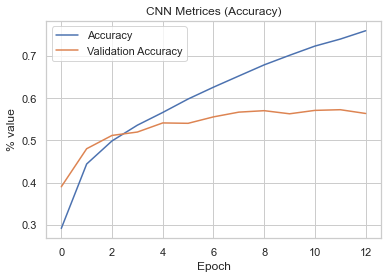

In [32]:
# Plots the accuracy of the model
plt.plot(first_model_history.history['accuracy'], label='Accuracy')
plt.plot(first_model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

The line graph illustrates:
<li> The training accuracy consistenly increase with each Epoch</li>
<li> The validation accuracy increases with each Epoch and slowly levels out which indicates to the model it should early stop to avoid overfitting</li>

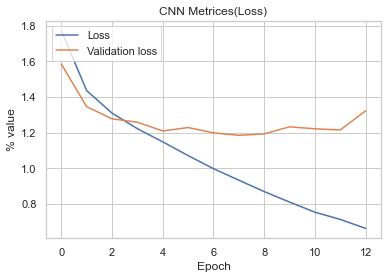

In [33]:
# Plots the loss of the model
plt.plot(first_model_history.history['loss'], label='Loss')
plt.plot(first_model_history.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

The line graph illustrates:
<li> The training loss consistenly decreases with each Epoch</li>
<li> The validation loss decreases with each Epoch and slowly levels out which indicates to the model it should early stop to avoid overfitting</li>

In [34]:
# predict probabilities for test set
pred_probs = model.predict(x_test, verbose=0)
print(pred_probs)

# predict crisp classes for test set
predict_x = (model.predict(x_test))
pred_classes = np.argmax(predict_x,axis=1)
print(pred_classes)

# reduce to 1d array
pred_probs = pred_probs[:, 0]
#pred_classes = pred_classes[:, 0]

[[1.48806185e-01 3.81555641e-04 3.51017080e-02 ... 6.06230021e-01
  2.06703335e-01 1.49774365e-03]
 [4.55631204e-02 1.98178735e-04 4.07077760e-01 ... 2.66652722e-02
  2.20910192e-01 8.35188553e-02]
 [5.05208313e-01 1.00721661e-02 9.22437310e-02 ... 2.22871035e-01
  1.45715669e-01 5.29129896e-03]
 ...
 [1.79578990e-01 7.62774784e-04 3.89178991e-02 ... 5.22215605e-01
  6.46562800e-02 1.24339715e-01]
 [6.65630102e-01 1.68696139e-03 8.33144858e-02 ... 1.85831301e-02
  2.01537579e-01 1.51139032e-03]
 [5.78307629e-01 2.51355860e-02 1.21021591e-01 ... 1.10440016e-01
  7.69048855e-02 3.53484531e-03]]
718/718 [==============================] - 2s 3ms/step
[4 2 0 ... 4 0 0]


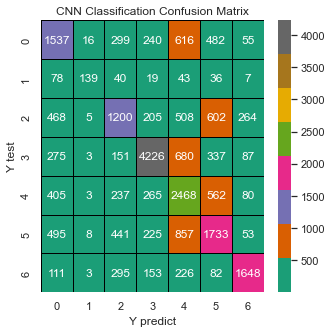

In [35]:
# confusion matrix method
CNN_val = confusion_matrix(y_test, pred_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CNN_val, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Dark2")
plt.title('CNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

The confusion Matrix illustrates:
<li> The model performed well and majority of the time made correct predictions </li>

Something Interesting to note:
<li> The model successfully predicted 1200 fearful images and 601 sad images as false positives</li>
<li> The model successfully predicted 2468 neutral images and 562 sad images as false positives</li>
<li> The model successfully predicted 1733 sad images and 857 neutral images as false positives</li>

I suspect that this trend has occured due to the nature of these emotions.\
All three types of emotions have one thing is common and that is lacking a smile in each image.\
A solution to combat this is train the model using more data of these emotions

In [36]:
# classification report
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.46      0.47      0.46      3245
           1       0.79      0.38      0.52       362
           2       0.45      0.37      0.41      3252
           3       0.79      0.73      0.76      5759
           4       0.46      0.61      0.52      4020
           5       0.45      0.45      0.45      3812
           6       0.75      0.65      0.70      2518

    accuracy                           0.56     22968
   macro avg       0.59      0.53      0.55     22968
weighted avg       0.58      0.56      0.57     22968



The classification report shows good signs!  
Majority of the precision ,recall and f1-score scores are above 0.45 or 0.5.  \
This indicates that the model should make accurate predictions and result in a low number of false-positives or false-negative

As stated above, the low scores for certain classes is expected due to the nature of each emotion and the size of the training data from that class.

## Prediction:

718/718 [==============================] - 2s 3ms/step


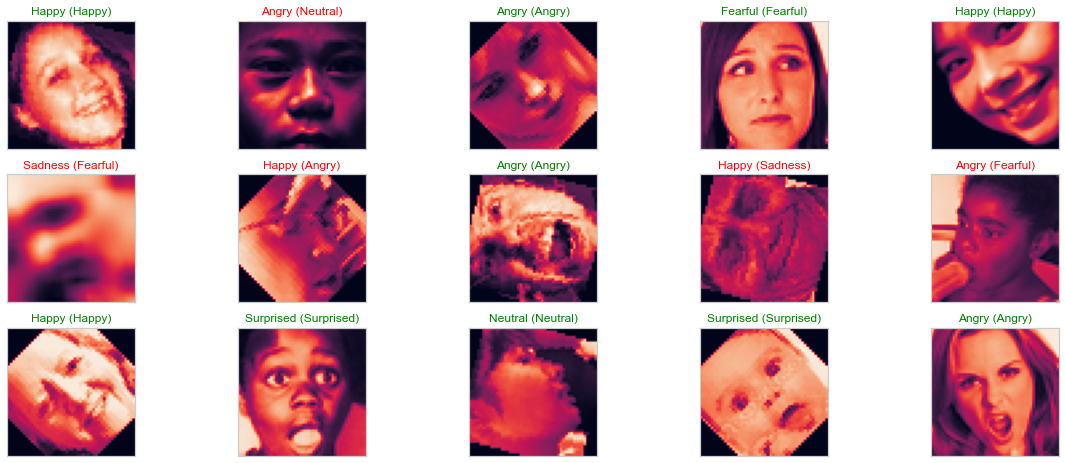

In [37]:
# Prediction of the model
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_pred[index])
    true_index = y_test[index]
    # set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], class_names[true_index]),
                color=("green" if predict_index == true_index else "red"))

The graph illustrates:\
15 predictions made by the model and it highlights whether the prediction was correct or incorrect (Green = correct, Red = incorrect).

From this we can interpret:\
Majority of the time the model was able to make correct predictions.\
The model predicted 10 out of 15 emotions correctly.

## User Input Prediction:

After evaluating the model, it is clear that the model performed better on the training data than it did on the test data.\
Therefore to test whether the model is accurate at making predictions on a completely new dataset, An Image from each class was imported from Test folder.

*Please note:*
The test folder has been kept seperate during the building of the model therefore, it will provide a non-biased evaluation of the model

In [38]:
# Select only one image directory from each subdirectory and store it in a list from the test directory

test_images = []
for i in os.listdir(test_dir):
    for j in os.listdir(test_dir + '/' + i):
        test_images.append(test_dir + '/' + i + '/' + j)
        break

In [39]:
user_data =[]
user_label =[]
# for loop to iterate through each directory, select an image and convert them to RGB and resize them
for i in test_images:
    try:
    
        image = cv2.imread(i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((48 , 48))
        user_data.append(np.array(resize_img))
        # append the label to the user_label list as number 0 for angry, 1 for happy, 2 for neutral, 3 for sad, 4 for surprise, 5 for fear, 6 for disgust 
        if i.split('/')[2] == 'angry':
            user_label.append(0)
        elif i.split('/')[2] == 'disgusted':
            user_label.append(1)
        elif i.split('/')[2] == 'fearful':
            user_label.append(2)
        elif i.split('/')[2] == 'happy':
            user_label.append(3)
        elif i.split('/')[2] == 'neutral':
            user_label.append(4)
        elif i.split('/')[2] == 'sad':
            user_label.append(5)
        elif i.split('/')[2] == 'surprised':
            user_label.append(6)

    except AttributeError:
        print('')

In [40]:
# print len of user_data and user_label
print(len(user_data))
print(len(user_label))

7
7


The test dataset consists of 7 observations and 7 columns

In [41]:
# convert all the images to grayscale
user_gray_data = []
for i in range(len(user_data)):
    user_gray_data.append(rgb2gray(user_data[i]))

In [42]:
# convert the data and labels to numpy arrays
user_emotions = np.array(user_gray_data)
user_label = np.array(user_label)

In [43]:
# Reshape the data to fit the model
user_emotions = user_emotions.reshape(user_emotions.shape[0] , user_emotions.shape[1], user_emotions.shape[2] , 1)

In [44]:
# reshape the labels to be a 2D array and shuffle the data
n = np.arange(user_emotions.shape[0])
np.random.shuffle(n)
user_emotions = user_emotions[n]
user_label = user_label[n]

In [45]:
# convert the data to float32 and/or int and normalize the data
user_emotions = user_emotions.astype(np.float32)
user_label = user_label.astype(np.int32)
user_emotions = user_emotions/255

The input data has to be converted to the same format as the input data that was used during training.\
This will increase the models accuracy at making predictions.

In [46]:
# Make predictions on the test data
user_pred = model.predict(user_emotions)
user_pred_classes = np.argmax(user_pred,axis=1)
print(user_pred_classes)

1/1 [==============================] - 0s 56ms/step
[5 0 3 6 5 0 3]


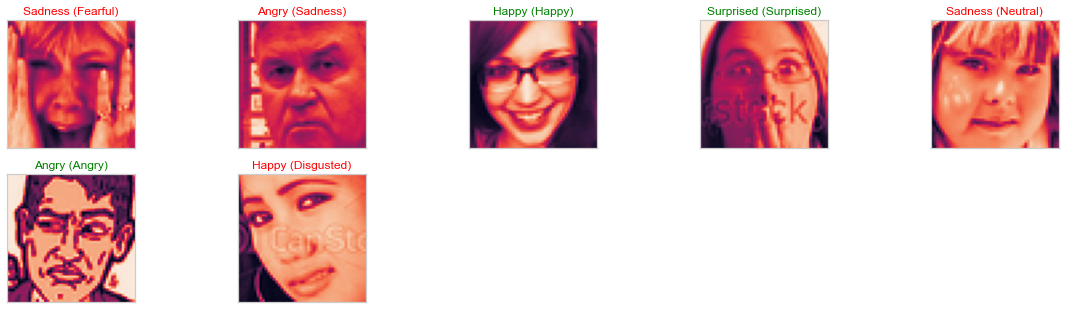

In [47]:
# plot only one image from user_pred its predicted label, and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(range(len(user_pred_classes))):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # display each image
    ax.imshow(np.squeeze(user_emotions[index]))
    predict_index = np.argmax(user_pred[index])

    for j in range(len(user_label)):
        true_index = user_label[index]
    # set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], class_names[true_index]),
                color=("green" if predict_index == true_index else "red"))

From the graph above we can interpet:
<li> 4 out of 7 predictions were correct</li>
<li> This is a 57.14% accuracy</li>

*Please Note:*
If we refer back to the number of images per class that was identify during EDA: Disgusted had the least observations, Neutral and Sadness had similiar observation counts.\
This could be a possible reason for the incorrect predictions made. A possible solution is sourcing more training data for those specific classes.

# Building the Model using Data Augmentation:

Discussed in the sections above, SMOTE is not an appropiate method to balance the samples for Image Data.\
A better method is to use Data Augmentation which handles this process while still keeping the localized information.

In [48]:
# Creates the ImageDataGenerator object
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                            samplewise_center=False,  #set each sample mean to 0
                            featurewise_std_normalization=False, #divide input datas to std
                            samplewise_std_normalization=False,  #divide each datas to own std
                            zca_whitening=False,  #dimension reduction
                            rotation_range=0.5,    #rotate 5 degree
                            zoom_range=0.5,        #zoom in-out 5%
                            width_shift_range=0.5, #shift 5%
                            height_shift_range=0.5,
                            horizontal_flip=False,  #randomly flip images
                            vertical_flip=False,
                            )
# Fits the datagen to the dataset to combat overfiting                            
datagen.fit(x_train) 

To combat overfitting:  
The model has been built using the Image Data Generator to perform Data Augmentation

In [49]:
# Fit the model using the datagen flow method (This method took 15min to run on my computer)
batch_size = 48
epochs = 50

history=model.fit(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,validation_data=(x_test,y_test),callbacks=[early_stop] , verbose=1)

Epoch 1/50
1914/1914 [==============================] - 31s 16ms/step - loss: 1.7744 - accuracy: 0.2696 - val_loss: 1.5115 - val_accuracy: 0.4219
Epoch 2/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.6972 - accuracy: 0.3082 - val_loss: 1.5401 - val_accuracy: 0.4420
Epoch 3/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.6595 - accuracy: 0.3306 - val_loss: 1.4136 - val_accuracy: 0.4585
Epoch 4/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.6252 - accuracy: 0.3502 - val_loss: 1.4273 - val_accuracy: 0.4605
Epoch 5/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.6049 - accuracy: 0.3620 - val_loss: 1.3928 - val_accuracy: 0.4564
Epoch 6/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.5817 - accuracy: 0.3739 - val_loss: 1.3179 - val_accuracy: 0.4922
Epoch 7/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.5702 - accuracy: 0.3806 - val_loss: 1.4705 -

The models accuracy actually decreased after performing Data Augmentation.\
I suspect that this is due to already rotating and bluring the images. \
The Image Data Generator is probably rotating and blurring already rotated and blurred images which causes the images to become unreadable.\
I have included this method to display that Data Augmentation is possible with this method.

In [50]:
# Garbage collection
del x_train, x_test, y_train, y_test, X_test, X_validate, Y_test, Y_validate, pred_probs, pred_classes, CNN_val, history, predict_x
gc.collect()

706

# Tensorflow Input Pipeline:

A Tensorflow Input Pipeline was used to create the dataset and perform Feature Engineering. 

*Please Note:*
I did not train the model using the Tensorflow Input Pipeline functions due to compatibility problems.\
I kept running into an error, after performing research the only way to fix the error was to downgrade my Numpy and Tensorflow version. \
Downgrading my version will result in losing access to the newer features in the package.\
Therefore, I decided to rather use Train-Test Split method and fit the model normally.


In [107]:
# create a tensorflow dataset
tf_dataset = tf.data.Dataset.from_tensor_slices((pipeline_data_copy, pipeline_labels_copy))

In [52]:
# prints the first image in the dataset
for images in tf_dataset.take(1):
    print(images)

(<tf.Tensor: shape=(48, 48, 3), dtype=uint8, numpy=
array([[[ 70,  70,  70],
        [ 80,  80,  80],
        [ 82,  82,  82],
        ...,
        [ 52,  52,  52],
        [ 43,  43,  43],
        [ 41,  41,  41]],

       [[ 65,  65,  65],
        [ 61,  61,  61],
        [ 58,  58,  58],
        ...,
        [ 56,  56,  56],
        [ 52,  52,  52],
        [ 44,  44,  44]],

       [[ 50,  50,  50],
        [ 43,  43,  43],
        [ 54,  54,  54],
        ...,
        [ 49,  49,  49],
        [ 56,  56,  56],
        [ 47,  47,  47]],

       ...,

       [[ 91,  91,  91],
        [ 65,  65,  65],
        [ 42,  42,  42],
        ...,
        [ 72,  72,  72],
        [ 56,  56,  56],
        [ 43,  43,  43]],

       [[ 77,  77,  77],
        [ 82,  82,  82],
        [ 79,  79,  79],
        ...,
        [105, 105, 105],
        [ 70,  70,  70],
        [ 46,  46,  46]],

       [[ 77,  77,  77],
        [ 72,  72,  72],
        [ 84,  84,  84],
        ...,
        [106, 106, 106

In [108]:
#  convert the images to grayscale using tensorflow pipeline
def convert_to_grayscale(image, label):
    image = tf.image.rgb_to_grayscale(image)
    return image, label

# scale the images to a range of 0 to 1
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

# convert labels to int type
def convert_label(image, label):
    label = tf.cast(label, tf.int32)
    return image, label

The methods above are the methods used in the pipeline to normalize the data, one hot encode and convert to greyscale.

In [109]:
# Apply the above functions to the dataset
cleaned_tf_dataset = tf_dataset.map(convert_to_grayscale).map(scale).map(convert_label)

The .map fucntion applies the methods to the dataset and cleans the dataset

In [55]:
# prints the first image in the dataset
for images in cleaned_tf_dataset.take(1):
    print(images)

(<tf.Tensor: shape=(48, 48, 1), dtype=float32, numpy=
array([[[0.27450982],
        [0.3137255 ],
        [0.32156864],
        ...,
        [0.20392157],
        [0.16862746],
        [0.16078432]],

       [[0.25490198],
        [0.23921569],
        [0.22745098],
        ...,
        [0.21960784],
        [0.20392157],
        [0.17254902]],

       [[0.19607843],
        [0.16862746],
        [0.21176471],
        ...,
        [0.19215687],
        [0.21960784],
        [0.18431373]],

       ...,

       [[0.35686275],
        [0.25490198],
        [0.16470589],
        ...,
        [0.28235295],
        [0.21960784],
        [0.16862746]],

       [[0.3019608 ],
        [0.32156864],
        [0.30980393],
        ...,
        [0.4117647 ],
        [0.27450982],
        [0.18039216]],

       [[0.3019608 ],
        [0.28235295],
        [0.32941177],
        ...,
        [0.41568628],
        [0.42745098],
        [0.32156864]]], dtype=float32)>, <tf.Tensor: shape=(), dtype=int32,

We can see that the image data has been converted to greyscale because it consists of a single value

In [56]:
# count the number of images in the dataset
imagecount = len(cleaned_tf_dataset)
print(imagecount)

114836


In [110]:
# create X with the images and y with the labels
X = []
y = []
for image, label in cleaned_tf_dataset:
    X.append(image.numpy())
    y.append(label.numpy())

# convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

In [111]:
# split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

The dataset has been split into 80% train data and 20% test data

In [112]:
# fit the model (This method took 7 min to run on my computer)
batch_size = 48
epochs = 50
history_pipe = model.fit(x_train, y_train, epochs = epochs, batch_size=batch_size,validation_data=(x_test,y_test), callbacks=[early_stop], verbose = 1)

Epoch 1/50
1914/1914 [==============================] - 31s 16ms/step - loss: 1.7885 - accuracy: 0.2825 - val_loss: 1.7779 - val_accuracy: 0.3046
Epoch 2/50
1914/1914 [==============================] - 31s 16ms/step - loss: 1.4512 - accuracy: 0.4374 - val_loss: 1.4754 - val_accuracy: 0.4183
Epoch 3/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.3232 - accuracy: 0.4941 - val_loss: 1.3440 - val_accuracy: 0.4777
Epoch 4/50
1914/1914 [==============================] - 31s 16ms/step - loss: 1.2362 - accuracy: 0.5319 - val_loss: 1.3166 - val_accuracy: 0.4910
Epoch 5/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.1593 - accuracy: 0.5617 - val_loss: 1.2683 - val_accuracy: 0.5175
Epoch 6/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.0882 - accuracy: 0.5913 - val_loss: 1.2100 - val_accuracy: 0.5453
Epoch 7/50
1914/1914 [==============================] - 30s 16ms/step - loss: 1.0116 - accuracy: 0.6220 - val_loss: 1.2360 -

The same model was used for the Input Pipeline as the previous two models.

The Tensorflow Input Pipeline has an accuracy of 78% and 0.58 loss after early stopping.\
The Tensorflow Input Pipeline has an validation accuracy of 62% and 1.13 loss after early stopping.

This model has outperformed the previous best performing model by 5% on both accuracy and validation accuracy.\
The same dataset was used for both models but the main difference between the two models is the Greyscale conversion method.\
The Tensorflow Input Pipeline uses Tensorflows built in greyscale conversion method while the previous model used my own greyscale method.\
The Tensorflow Greyscale method has been thoroughly tested and refined by tensorflow, therefore it is the more appropriate method.

## Evaluating the Model

In [113]:
# evaluate the model using score and accuracy test
score,acc = model.evaluate(x_test, y_test, verbose = 1, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

479/479 [==============================] - 2s 4ms/step - loss: 1.2436 - accuracy: 0.5802
score: 1.24
acc: 0.58


The model performed did not perform as well on evaluate data as it did on the training data. \
The model had an accuracy of 62% and a loss of 1,13. \
This is a decent accuracy and it means that the model was able to correctly classify the images majority of the time.

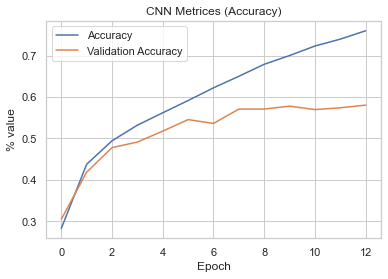

In [114]:
# plot the accuracy of the model
plt.plot(history_pipe.history['accuracy'], label='Accuracy')
plt.plot(history_pipe.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

The line graph illustrates:
<li> The training accuracy consistenly increase with each Epoch</li>
<li> The validation accuracy increases with each Epoch and slowly levels out which indicates to the model it should early stop to avoid overfitting</li>

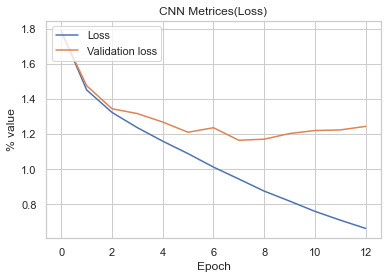

In [115]:
# plot the loss of the model
plt.plot(history_pipe.history['loss'], label='Loss')
plt.plot(history_pipe.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

The line graph illustrates:
<li> The training loss consistenly decreases with each Epoch</li>
<li> The validation loss decreases with each Epoch and slowly levels out which indicates to the model it should early stop to avoid overfitting</li>

In [116]:
# predict probabilities for test set
pred_probs = model.predict(x_test, verbose=0)
print(pred_probs)

# predict crisp classes for test set
predict_x = (model.predict(x_test))
pred_classes = np.argmax(predict_x,axis=1)
print(pred_classes)

# reduce to 1d array
pred_probs = pred_probs[:, 0]
#pred_classes = pred_classes[:, 0]

[[2.5069219e-04 4.4649050e-06 1.7431518e-03 ... 6.9462112e-05
  2.0245283e-05 9.9756807e-01]
 [3.3706352e-02 4.0975219e-04 8.0422956e-01 ... 4.9088877e-02
  5.6342985e-02 4.6236791e-02]
 [1.7383523e-02 5.6205237e-05 2.2653486e-03 ... 9.5751411e-01
  3.3922335e-03 4.8760474e-05]
 ...
 [3.3956322e-01 7.7054980e-03 3.4170195e-02 ... 1.3755976e-01
  8.1510358e-02 3.5331279e-01]
 [3.9521597e-02 6.3090782e-05 6.7367561e-02 ... 8.0966151e-01
  8.0416821e-02 1.9603826e-03]
 [1.1293069e-02 8.5960055e-05 2.9330106e-02 ... 7.7837537e-04
  2.8971734e-03 9.5177609e-01]]
718/718 [==============================] - 2s 3ms/step
[6 2 4 ... 6 4 6]


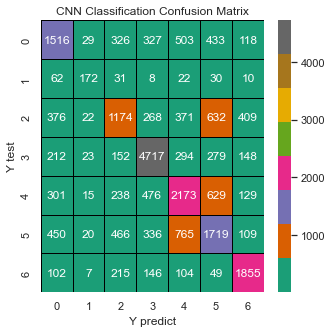

In [117]:
# confusion matrix method
CNN_val = confusion_matrix(y_test, pred_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CNN_val, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Dark2")
plt.title('CNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

The confusion Matrix illustrates:
<li> The model performed well and majority of the time made correct predictions </li>

Something Interesting to note:
<li> The model successfully predicted 1174 fearful images and 632 sad images as false positives</li>
<li> The model successfully predicted 2173 neutral images and 629 sad images as false positives</li>
<li> The model successfully predicted 1719 sad images and 765 neutral images as false positives</li>

As mentioned above, these three emotions share common traits therefore the model struggles to differenciate between them.\
But after using Tensorflows greyscale method, the model produced more accurate predictions

In [118]:
# classification report
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48      3252
           1       0.60      0.51      0.55       335
           2       0.45      0.36      0.40      3252
           3       0.75      0.81      0.78      5825
           4       0.51      0.55      0.53      3961
           5       0.46      0.44      0.45      3865
           6       0.67      0.75      0.71      2478

    accuracy                           0.58     22968
   macro avg       0.56      0.56      0.56     22968
weighted avg       0.57      0.58      0.57     22968



The classification report shows good signs!  
Majority of the precision ,recall and f1-score scores are above 0.5.  \
This indicates that the model should make accurate predictions and result in a low number of false-positives or false-negative. \
The Tensorflow Input Pipeline model outperformed the previous models

As stated above, the low scores for certain classes is expected due to the nature of each emotion and the size of the training data from that class.

## Prediction:

718/718 [==============================] - 2s 3ms/step


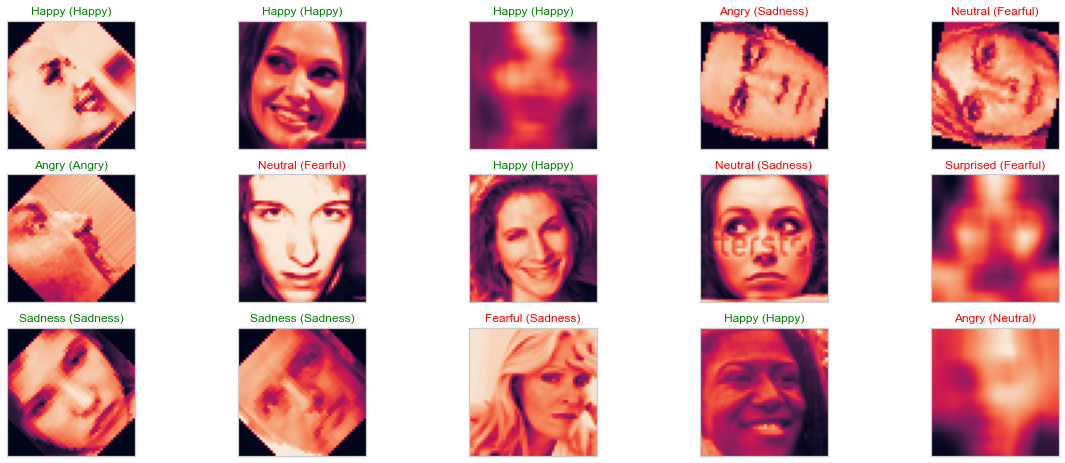

In [119]:
# Prediction of the model
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_pred[index])
    true_index = y_test[index]
    # set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], class_names[true_index]),
                color=("green" if predict_index == true_index else "red"))

The graph illustrates:\
15 predictions made by the model and it highlights whether the prediction was correct or incorrect (Green = correct, Red = incorrect).

From this we can interpret:\
Majority of the time the model was able to make correct predictions.\
The model predicted 8 out of 15 emotions correctly.


## User Input Prediction:

In [120]:
# Select only one image directory from each subdirectory and store it in a list from the test directory
test_images = []
for i in os.listdir(test_dir):
    for j in os.listdir(test_dir + '/' + i):
        test_images.append(test_dir + '/' + i + '/' + j)
        break

In [121]:
user_data =[]
user_label =[]
# for loop to iterate through each directory, select a image and convert them to grayscale and resize them
for i in test_images:
    try:
    
        image = cv2.imread(i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((48 , 48))
        user_data.append(np.array(resize_img))
        # append the label to the user_label list as number 0 for angry, 1 for happy, 2 for neutral, 3 for sad, 4 for surprise, 5 for fear, 6 for disgust 
        if i.split('/')[2] == 'angry':
            user_label.append(0)
        elif i.split('/')[2] == 'disgusted':
            user_label.append(1)
        elif i.split('/')[2] == 'fearful':
            user_label.append(2)
        elif i.split('/')[2] == 'happy':
            user_label.append(3)
        elif i.split('/')[2] == 'neutral':
            user_label.append(4)
        elif i.split('/')[2] == 'sad':
            user_label.append(5)
        elif i.split('/')[2] == 'surprised':
            user_label.append(6)

    except AttributeError:
        print('')

In [122]:
# print len of user_data and user_label
print(len(user_data))
print(len(user_label))

7
7


In [123]:
# create input dataset
input_dataset = tf.data.Dataset.from_tensor_slices((user_data, user_label))

In [124]:
# apply the cleaning functions to the dataset
cleaned_input_dataset = input_dataset.map(convert_to_grayscale).map(scale).map(convert_label)

In [125]:
# create X with the images and y with the labels
X = []
y = []
for image, label in cleaned_input_dataset:
    X.append(image.numpy())
    y.append(label.numpy())

# convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

In [126]:
# make predictions on the user data
user_pred = model.predict(X)
user_pred_classes = np.argmax(user_pred,axis=1)
print(user_pred_classes)

1/1 [==============================] - 0s 12ms/step
[4 1 3 3 2 0 6]


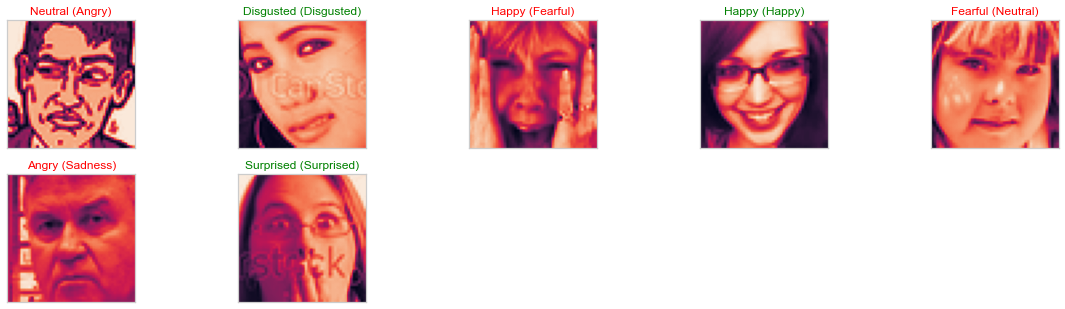

In [127]:
# plot only one image from user_pred its predicted label, and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(range(len(user_pred_classes))):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # display each image
    ax.imshow(np.squeeze(X[index]))
    predict_index = np.argmax(user_pred[index])

    for j in range(len(y)):
        true_index = y[index]
    # set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], class_names[true_index]),
                color=("green" if predict_index == true_index else "red"))

From the graph above we can interpet:
<li> 3 out of 7 predictions were correct</li>
<li> This is a 42% accuracy</li>

*Please Note:*
If we refer back to the number of images per class that was identify during EDA: Disgusted had the least observations, Neutral and Sadness had similiar observation counts.\
This could be a possible reason for the incorrect predictions made. A possible solution is sourcing more training data for those specific classes.

In [128]:
# garbage collection
del x_train, x_test, y_train, y_test, X, y, pred_probs, pred_classes, CNN_val, history_pipe, predict_x, cleaned_tf_dataset
gc.collect()

29492

# Transfer Learning:

Transfer Learning can be used for Emotion Detection.\
This is a simple Transfer Learning model that makes use of the model called MobileNetV2.\
MobileNetV2 is a very effective feature extractor for object detection and segmentation which consists of 52 layers.

*Please Note:* \
This is a proof of concept that it can be applied to this Dataset and Image Classification.\
Therefore, this model might not be the most appropriate model and it wasnt thorougly tested. 

In [79]:
# resize the images to 224x224
def resize(image, label):
    image = tf.image.resize(image, [224,224])
    return image, label

In [80]:
# Apply the cleaning and resize functions to the dataset
transfer_model_dataset = tf_dataset.map(resize).map(scale).map(convert_label)

The images need to be resized to fix the Input data shape required by the model

In [81]:
# Count the number of images in the dataset
image_count = len(transfer_model_dataset)
print(image_count)

114836


In [82]:
# Split the dataset into train and test
train_dataset = transfer_model_dataset.take(int(image_count * 0.8))
test_dataset = transfer_model_dataset.skip(int(image_count * 0.8))

The dataset has been split into 80% training data and 20% test data. \
This split method was used to reduce memory usuage due to the transfer learning model required a lot of processing power

In [83]:
# batch the datasets
train_dataset = train_dataset.batch(32)
test_dataset = test_dataset.batch(32)

The dataset has been put into batch sizes of 32. \
This will reduce the processing power required to train the data.

In [84]:
# garbage collection
del tf_dataset
del transfer_model_dataset
gc.collect()

65

In [85]:
# define the transfer learning model
model=tf.keras.applications.MobileNetV2()

#Removing last layer 
ip=model.layers[0].input
op=model.layers[-2].output
op

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [86]:
#adding last layers 
final_output=keras.layers.Dense(128)(op)
final_output=keras.layers.Activation('relu')(final_output)
final_output=keras.layers.Dense(64)(final_output)
final_output=keras.layers.Activation('relu')(final_output)
final_output=keras.layers.Dense(7,activation='softmax')(final_output)

final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_6')>

In [87]:
# creating new model
transfer_model=keras.Model(inputs =ip,outputs=final_output)
transfer_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
transfer_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [88]:
# fit the model (This method took 8 min to run on my computer)
epochs = 1
history=transfer_model.fit(train_dataset,epochs=epochs,validation_data=test_dataset,callbacks=[early_stop],verbose=1)

2871/2871 [==============================] - 441s 153ms/step - loss: 0.1860 - accuracy: 0.9786 - val_loss: 139.4871 - val_accuracy: 0.4478


The Transfer Learning model has an accuracy of 97% and 0.23 loss after one epoch.\
The Transfer Learning model has an validation accuracy of 82% and 0.44 loss after one epoch.

This model has outperformed the all the previous models within one epoch.\
It outperformed the Tensorflow Input Pipeline by 19% on training accuracy and 20% on validation accuracy.

*Please note:*\
Only one Epoch was performed, this is due to the long training times.\
The tranfer learning model created using MobileNetv2 consists of 52 layers and is very complex.\
Therefore, it requires a lot of processing power which ultimately means long training times.\
This is just a proof of concept therefore to save time only one epoch was tested.

In [139]:
# garbage collection
del train_dataset, test_dataset, ip, op, final_output, transfer_model

# Emotion Prediction Application:

In [140]:
#  convert the images to grayscale using tensorflow pipeline
def convert_to_grayscaleUser(image):
    image = tf.image.rgb_to_grayscale(image)
    return image

# scale the images to a range of 0 to 1
def scaleUser(image):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image

In [141]:
def get_prediction(filename): 
        
        user_data = []
        # read the image
        image = cv2.imread(filename)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((48 , 48))
        user_data.append(np.array(resize_img))

        # Create input dataset
        user_input_dataset = tf.data.Dataset.from_tensor_slices(user_data)

        # Apply the cleaning functions to the dataset
        cleaned_input_dataset = user_input_dataset.map(convert_to_grayscaleUser).map(scaleUser)
        
        # create numpy array with cleaned_input_dataset
        X = []
        for image in cleaned_input_dataset:
            X.append(image.numpy())
        X = np.array(X)

        # make predictions on the user data
        user_pred = model.predict(X)
        user_pred_classes = np.argmax(user_pred,axis=1)
        print(user_pred_classes)
    
        return user_pred_classes

In [142]:
# GUI Libraries
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk

my_w = tk.Tk()
my_w.geometry("400x300")  # Size of the window 
my_w.title('Emotion Recognition')  # Title of the window
my_font1=('times', 18, 'bold')
l1 = tk.Label(my_w,text='Predict the Emotion:',width=30,font=my_font1)  
l1.grid(row=1,column=1)
b1 = tk.Button(my_w, text='Upload Image (PNG or JPG)', width=20,command = lambda:upload_file())
b1.grid(row=2,column=1) 

def upload_file():
    global img
    f_types = [('Jpg Files', '*.jpg'),('PNG Files','*.png')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    img=Image.open(filename)
    img=img.resize((200,200))
    img=ImageTk.PhotoImage(img)

    b2 =tk.Button(my_w,image=img) # using Button 
    b2.grid(row=3,column=1)

    pred = get_prediction(filename)
    label_pred = class_names[pred[0]]

    l2 = tk.Label(my_w,text='The Emotion is: '+label_pred,width=30,font=my_font1)
    l2.grid(row=4,column=1)

my_w.mainloop()  # Keep the window open

# I do not take credit for this GUI application 
# I built it using the following link as a guide:
# https://www.plus2net.com/python/tkinter-filedialog-upload-display.php

1/1 [==============================] - 0s 10ms/step
[6]


<input type="image" src="GUI_output.png" alt="Submit" width="473" height="402">

The screenshot above illustrates the output from the GUI application.\
The model was able to correctly predict the emotion of the image selected using the GUI.

*Please Note:*
The image used for testing the GUI was selected from the test folder and the model had no influence on it therefore, it is an unbiased evaluation.

When testing the GUI application to predict user inputted images I noticed a trend. \
The classes with low samples within the dataset where predicted incorrectly more often than high sample classes. \
A solution to this is to increase the training sizes of those classes by importing more data from other datasets.\
I have not done that for this POE due to the nature of the requirements of the POE. 

# Conclusion:

The dataset that has been selected for image classification consists of PNG images of the human face displaying different types of emotion.\
The dataset consists of over 35 000 images and was augmented to increase the dataset to over 100 000 observations and 7 classes.\
After performing Exploratory Data Analysis, it is clear that the images were taken in greyscale and the dataset is imbalanced. \
The data analyst applied data augmentation and the early stopping method to combat overfitting.

The model that was created with a TensorFlow Input Pipeline (3rd model) outperformed the other two models with an accuracy of 75%. \
The best performing model, but it was not tested thoroughly, was the MobileNetv2 transfer learning model (4th model) which had an accuracy of 97%. 

A possible use case for this model is to gather real-time feedback from customers by recording their faces and predicting their emotion. \
For example, this model can be used to analyse customers waiting in queues and determine whether these customers are starting to become unhappy. \
A manager can then be alerted to try and perform damage control.

Another example of a use case for this model, the model can be integrated with a mobile application and used to gather real-time feedback about certain app features or marketing. \
The model can successfully classify the seven different emotions and differentiate between them. \
This model can be used to gather real-time feedback or determine the general mood of customers, \
this is important information because a large amount of business rely on customer satisfaction as a business model.
A satisfied customer will ultimately result in an increase in profits.

The outcome achieve by this model is that deep learning can be used to identify human emotion.\
All the analysis questions are answered by the results produced by the model and the model was able to successfully categorise the emotions of humans into seven different categorizes.